## Network Science Project 1
### Spring 2024
### Due: February 9th, 1:00pm GMT

Please provide the following information:

Group number:

CID #1: 01949015

CID #2: 02211173

CID #3: 02541104

### Overview

Over the past few weeks we have been studying different graph models, with the aim of using these models to interpret real-world networks. In this project, we will compare the degree distributions of different models, and apply the $G_{Np}$ model to a real-world dataset. 

In [1]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#You may also use scipy as needed

## Task 1: The Iteration Graph Model and Barabsai-Albert Model



### Part 1: The iteration model (7 marks)
In Problem sheet 2, Question 1, the following model for an undirected graph was given:
1. Initial state: 2 nodes connected by 1 link.
2. Iteration 1: Replace the link between the node pair with two new nodes and four new links arranged so that the two original nodes are only connected by 2 “fully distinct” length-2 paths. Here, two paths are “fully distinct” if they have zero links in common. 
3. Iteration i + 1: Apply the process for iteration 2 to each linked node pair in the graph at iteration i. So, for each linked pair of nodes in the graph at iteration i, and replace it with two new nodes and four new links so that the two ‘old’ nodes are connected by 2 new fully distinct length 2 paths.

This model will now be named the *Iteration Model* for the purpose of the project.

1. Below, a function 'generate_graph' has been defined to generate a graph using the Iteration Model, for 'it' ammount of iterations. Complete the function below to *efficiently* generate the graph. Comments and some lines of code have been provided for guidance. You should think carefully about how to avoid unnecessary calculations and unnecessary loops. You may use numpy and scipy as needed. If using scipy, add the appropriate import statements to the cell below within the function. **Do not use or import any other modules for this question**. Below the function, provide a 2-3 sentence explanation of the main steps you have taken to make your code efficient.

In [2]:
import networkx as nx
import numpy as np

def generate_graph(it):
    """
    Generate a graph using the required model

    Input:
    it: The amount of iterations required to generate the graph G
    
    Output:
    G: The graph after the desired iterations

    Please do not modify the function input or the return statement below
    """
    
    #The initial state
    G = nx.Graph()
    G.add_edge(1, 2)


    new_node_id = 3
    for p in range(it):
        copy_edges = list(G.edges())
        for (a, b) in copy_edges:
            G.remove_edge(a, b)
            G.add_edge(new_node_id, a)
            G.add_edge(new_node_id, b)
            G.add_edge(new_node_id+1, a)
            G.add_edge(new_node_id+1, b)
            new_node_id +=2
    
    return G


Each pair of linked nodes is stored as an "edge". Simply get every edge and substitute it for 2 nodes and 4 edges ("bridge" the edge)



2. Draw the graph for three iterations (1 more than in the problem sheet), and verify the number of links or nodes are as expected by the theory derived in the problem sheet.

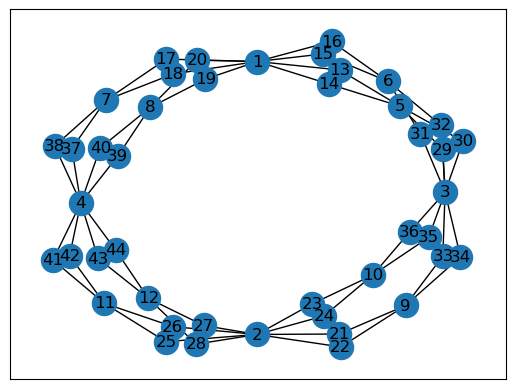

In [3]:
it = 3
G = generate_graph(it)
plt.figure()
nx.draw_networkx(G)

In [4]:
def expected_number_of_edges(it):
    return 4**it

def expected_number_of_nodes(it):
    return int(2*(4**it+2)/3)

print('Number of nodes of the graph: {}'.format(G.number_of_nodes()))
print('Expected number of nodes: {}'.format(expected_number_of_nodes(it)))
print('Number of edges of the graph: {}'.format(G.number_of_edges()))
print('Expected number of edges: {}'.format(expected_number_of_edges(it)))

Number of nodes of the graph: 44
Expected number of nodes: 44
Number of edges of the graph: 64
Expected number of edges: 64


The number of edges gets multiplied by 4 each time. The number of nodes $N(i) = N(i-1) + 2E(i-1)$ because it is the number of previous nodes plus the number of nodes generated by the previous iteration (each edge generates two new nodes). This is a geometric series.

$$2·4^0 + 2·4^1 + ... + 2·4^n= 2\sum^{n}_{i=0}4^i = 2\frac{4^n+2}{3}$$

### Part 2: Degree distribution and the Barabasi-Albert model (6 points)

We will study the Barabasi-Albert model in upcoming lectures. NextworkX generates a Barabasi-Albert graph when given the number of nodes 'n', and the number of edges 'm' to attach from a new node to an existing node. More information is given here https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph


Here, we will use the Barabasi-Albert model to generate a graph of N nodes, with $m=2$, and compare the degree distribution of said graph, to the degree distribution of a graph generated from the Iteration model for 'it' iterations. 

1) Develop a code below to create a well-designed figure to compare the degree distributions of a Barabasi-Albert graph for N nodes with m=2, and the degree distribution of the Iteration model. When comparing the two graphs generated by each model, the graphs should have the same amount of nodes N, and both distributions should be shown on the same plot. Produce three figures in total by considering first 3 iterations (figure 1), and subsequently 4 (figure 2) and 5 (figure 3) (Note: taking the iterations too large will take a long time to run).

2) Describe the trends you see in the three figures in a short paragraph, focusing on the patterns associated with changing the amount of iterations (and therefore N), as well as differences and similarities between the two distributions.

3) Does this change when $m$ is varied? There is no need to show the figures for other $m$, just a comment on the patterns emerging. 

In [5]:
def get_distribution_arrays(it):
    N = expected_number_of_nodes(it)

    G_BA = nx.barabasi_albert_graph(N, 2)
    k_distribution_BA = nx.degree_histogram(G_BA)
    k_distribution_BA = np.array(k_distribution_BA)/N

    G_it = generate_graph(it)
    k_distribution_it = nx.degree_histogram(G_it)
    k_distribution_it = np.array(k_distribution_it)/N

    return k_distribution_BA, k_distribution_it

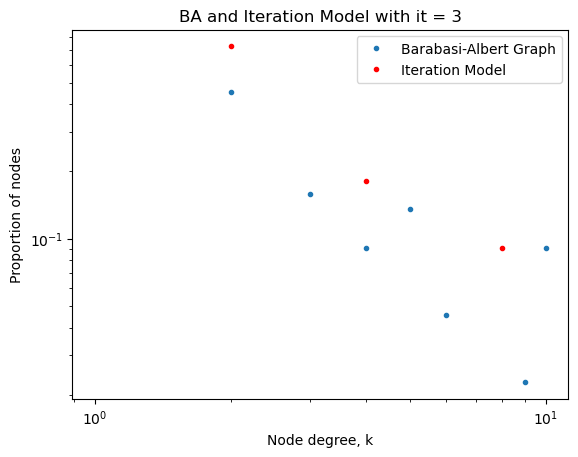

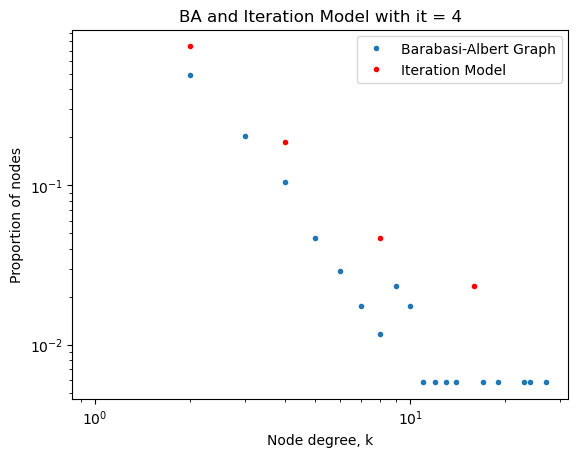

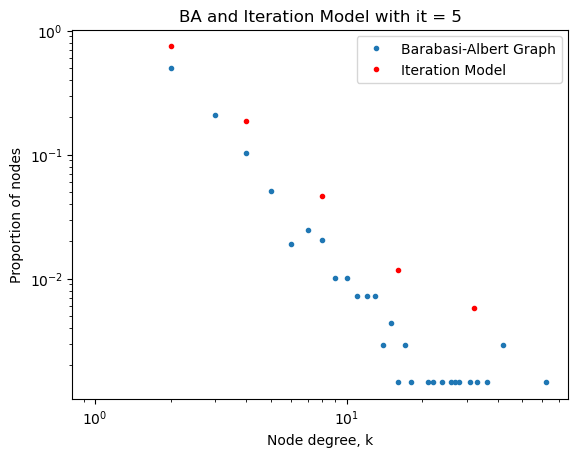

In [6]:
n = 1
for it in [3,4,5]:
    k_distribution_BA, k_distribution_it = get_distribution_arrays(it)
    plt.figure(n)
    n += 1
    plt.title('BA and Iteration Model with it = {}'.format(it))
    plt.xlabel('Node degree, k')
    plt.ylabel('Proportion of nodes')
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(k_distribution_BA, '.', label='Barabasi-Albert Graph')
    plt.plot(k_distribution_it, '.', color='red', label='Iteration Model')
    plt.legend()

plt.show()

*Add explanation here*



## Task 2: Comparing the $G_{Np}$ model with a real-world dataset (7 points)

We have considered the $G_{Np}$ model in Lectures and Labs. In particular, we have studied the expected values of certain model properties and derived equations for these. For this part of the project, we won't be using the $G_{Np}$ graph generator provided by NetworkX, but rather the derivations derived in lectures for the expected number of edges and triangles of a $G_{Np}$ graph, and the probability distribution of the $G_{Np}$ graph. We will compare the expected values for a $G_{Np}$ graph to the actual number of edges, triangles and degrees of nodes in a real-world data set, and produce a judgement on whether the dataset could be modeled with the $G_{Np}$ model.

1) Below, the functions "expected_edges" and "degree_dist" have been defined in order to determine the expected number of edges for a graph generated by the $G_{Np}$ model for $N$ nodes and probability $p$, and to calculate the probability that a node has a degree k in a $G_{Np}$ graph. Add code to complete the functions to return the expected number of edges and the probability distribution, using the theory from lectures. You will see that scipy.special.comb has been imported for use in the functions. 

In [7]:
from scipy.special import comb
def expected_edges(N,p):
    """Expected number of edges in G_Np graph
    Input:
    N: number of nodes 
    p: probability of a link being placed between two distinct nodes
    
    Output:
    exp_L: expected number of edges
    
    """
    #Add code here
    exp_L = comb(N,2)*p
    return exp_L

def degree_dist(N,p,k):
    """Probability that a node has a degree k in G_Np model
    Input: 
    N: number of nodes 
    p: probability of a link being placed between two distinct nodes
    k: degree  

    Output:
    p_k: probability that a node has a degree k
    """
    
    #Add code here
    p_k = comb(N-1,k)*(p**k)*((1-p)**(N-1-k))
    return p_k


def expected_triangles(N,p):
    """Expected number of triangles in GNp graph
    """
    return comb(N,3)*p**3

def count_triangles(G):
    """Returns total number of triangles in G
    """
    t = nx.triangles(G)
    return np.sum(list(t.values()))/3


You have been provided with a dataset of email connections in an email network. Run the cell below to load the data. Check that there are 1133 nodes and 5451 edges in the network.

In [8]:
#Load data
edges_data = nx.read_edgelist('email-univ.edges')
G1 = nx.Graph(edges_data)

#Check nodes and edges are correct
nodes_num = G1.number_of_nodes()
edges_num = G1.number_of_edges()
print(nodes_num,' ',nodes_num == 1133) 
print(edges_num,' ',edges_num == 5451)


1133   True
5451   True


Yes, there are 1133 nodes and 5451 edges in the network.

2)a) Using the functions previously defined in Task 2 Q1, compare the expected number of triangles and edges in a $G_{Np}$ model. with the dataset values. You should consider three cases $p=0.01, 0.1, 0.2$. Comment on the actual number of triangles and edges in comparison to the $G_{Np}$ model.

In [9]:
N = 1133
p1 = 0.01
p2 = 0.1
p3 = 0.2
exp_tri_p1 = expected_triangles(N,p1)
exp_edge_p1 = expected_edges(N,p1)
exp_tri_p2 = expected_triangles(N,p2)
exp_edge_p2 = expected_edges(N,p2)
exp_tri_p3 = expected_triangles(N,p3)
exp_edge_p3 = expected_edges(N,p3)

actual_tri = count_triangles(G1)
actual_edge = 5451
print("The actual number of edges is", actual_edge,"the actual number of triangles is", actual_tri)

print("With p=0.01, the expected edge number is",
       exp_edge_p1,",the expected triangle number is",
       exp_tri_p1)
print("With p=0.1, the expected edge number is",
       exp_edge_p2,",the expected triangle number is",
       exp_tri_p2)
print("With p=0.2, the expected edge number is",
       exp_edge_p3,",the expected triangle number is",
       exp_tri_p3)

The actual number of edges is 5451 the actual number of triangles is 5343.0
With p=0.01, the expected edge number is 6412.78 ,the expected triangle number is 241.76180600000004
With p=0.1, the expected edge number is 64127.8 ,the expected triangle number is 241761.80600000007
With p=0.2, the expected edge number is 128255.6 ,the expected triangle number is 1934094.4480000006


It seems that the real data we have doesn't fit the $G_{Np}$ model, as in all cases, the expected edges are higher than the actual value, with actual value 5451, we have expected values to be 6412,64120 and 128255. Moreover, when p = 0.01, the number of edges expected of the $G_{Np}$ model has already exceeded the actual number of edges while the expected triangle number is significantly less than the actual number of triangles. When increasing the probability to 0.1 and 0.2, the expected triangle number increase significantly under GNP model, become 241761 and 1934094, is 100 times and even 1000 times more than the actual number of triangles, 5343.

2)b) First find the degree distribution for the dataset, then find the expected degree distribution for $0\leq k \leq 300$ with a $G_{Np}$ model when $p=0.01,0.1,0.2$. Produce one figure showing this comparison for all four degree distributions for $0\leq k \leq 300$. In a few lines describe what you see. 

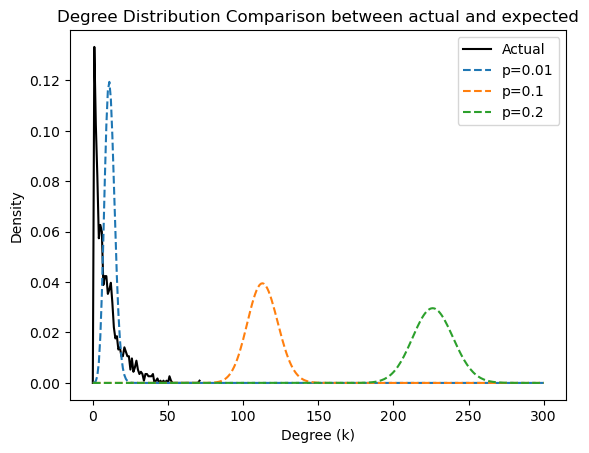

In [10]:
degree_distribution = nx.degree_histogram(G1)

degree_distribution_p1 = []
degree_distribution_p2 = []
degree_distribution_p3 = []
N = 1133
p1 = 0.01
p2 = 0.1
p3 = 0.2

d_dist = np.array(degree_distribution)/N
for k in range(301):
    p1k = degree_dist(N,p1,k)
    degree_distribution_p1.append(p1k)
    p2k = degree_dist(N,p2,k)
    degree_distribution_p2.append(p2k)
    p3k = degree_dist(N,p3,k)
    degree_distribution_p3.append(p3k)

plt.figure()
plt.plot(range(len(degree_distribution)), d_dist, label="Actual", color='black')
plt.plot(range(301), degree_distribution_p1, label="p=0.01", linestyle='dashed')
plt.plot(range(301), degree_distribution_p2, label="p=0.1", linestyle='dashed')
plt.plot(range(301), degree_distribution_p3, label="p=0.2", linestyle='dashed')


# Customize the plot
plt.title("Degree Distribution Comparison between actual and expected")
plt.xlabel("Degree (k)")
plt.ylabel("Density")
plt.legend()
plt.show()

The actual model has a much higher degree distribution than $G_{Np}$ model for low-degree nodes, k<50. For $G_{Np}$ model, the higher the probability, the higher degree distribution that high-degree nodes are going to have. The actual data has degree distribution of mostly zero for k > 50, while the peaks of graph of p = 0.1 and 0.2 happen roughly at k = 110 and k = 225 respectively, but with much lower density than the actual's peak.

2c) Give your judgement on whether the $G_{Np}$ model predicts the behaviour of the dataset accurately in a short paragraph.

It is obvious that the $G_{Np}$ model doesn't predict the behaviour of the dataset accurately, as neither the number of edges and triangles nor the degree distribution of the $G_{Np}$ model fits the actual data set. The observed data in the actual network differ substantially from the expectations of the model, especially for large p = 0.1 and 0.2. With p = 0.01, we get the closest match in the degree distribution. However, it is still a bad prediction as we find earlier there is a large difference in the number of triangles, which means that the actual graph has totally different properties compared to $G_{Np}$ models. This indicates that the assumption of the $G_{Np}$ model that each link has the same probability p to be generated isn't true for the real network of the dataset. This real network has a high probability that is not based on Bernoulli trials.

### Further guidance

* Your group should submit both a completed Jupyter notebook and a pdf version of the notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first. Each group should make a single submission.
    To submit your assignment, go to the **Assesments and Mark Schemes** folder on the module Blackboard page. In the folder there is another folder called **Coursework 1 Drop Box Spring 24** within this folder there are two dropbox's one for the pdf and one for a ZIP file which should include your ipynb file. To convert a file to ZIP, right click on the file and click "compress" and this will generate a ZIP. (these should be named *project1_groupx.ipynb* and *project1_groupx.pdf* where x is your group number.
*Please make sure all CID numbers are written at the top of the project.
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed. Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
